In [122]:
# 필요한 라이브러리 설치 및 임포트
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from xgboost import XGBRegressor
import joblib

# [Step 3] 머신러닝 모델링1

#### **<span style="color:blue">[3-1] 학습 및 테스트 데이터 로딩</span>**

In [123]:
# train_x.csv / train_y.csv / test_x.csv / test_y.csv 4개의 데이터 로딩
x_train = pd.read_csv("train_x.csv")
y_train = pd.read_csv("train_y.csv")
x_test = pd.read_csv("test_x.csv")
y_test = pd.read_csv("test_y.csv")

In [124]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((8759, 27), (8759, 1), (2160, 27), (2160, 1))

#### **<span style="color:blue">[3-2] 모델링: LinearRegression</span>**

* Train과 Test로 나눈 데이터를 기준으로 LinearRegression 모델링을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : MSE, R-squared Score(소수점 5째자리까지)

In [125]:
# LinearRegression 코드를 작성하세요.
# 1단계: 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 2단계: 선언하기
model = LinearRegression()

# 3단계: 학습하기
model.fit(x_train, y_train)

# 4단계: 예측하기
y_pred = model.predict(x_test)

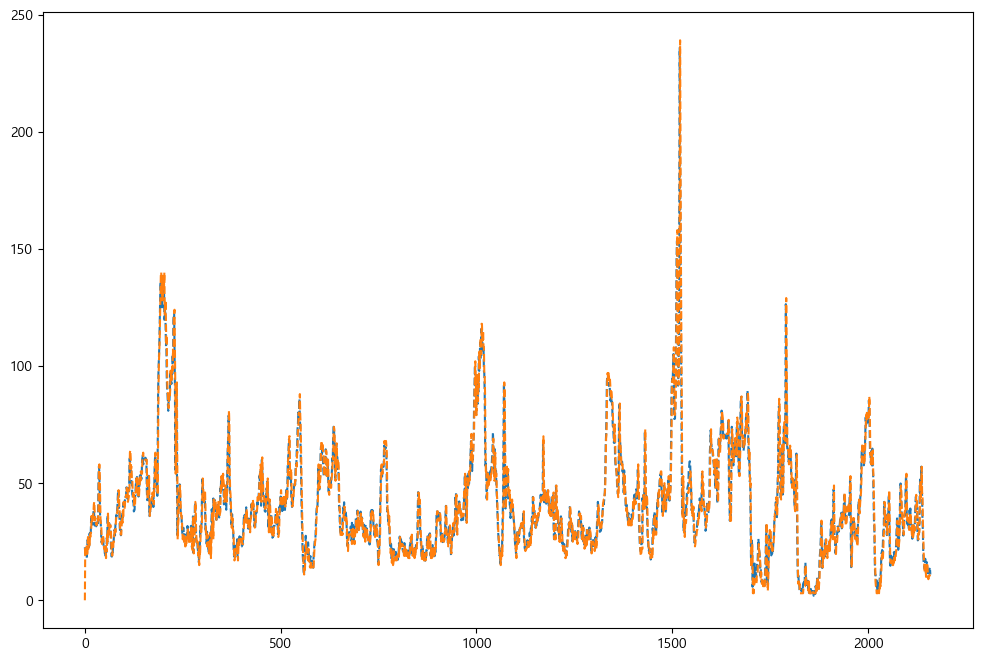

MSE :  37.553139422697754
R2 :  0.9320155001253034


In [126]:
# test_y 데이터와 y_pred_LR 데이터로 성능을 평가하여 출력해보세요.
# 성능지표는 mse와 r2를 이용하세요.
plt.figure(figsize = (12, 8))
plt.plot(y_pred, ls = "--")
plt.plot(y_test.values, ls = "--")
plt.show()

print("MSE : ", mean_squared_error(y_test, y_pred))
print("R2 : ", r2_score(y_test, y_pred))

In [127]:
# 학습한 모델을 pkl 파일로 저장해보세요.
import pickle
with open("LR_model.pkl", "wb") as f:
    pickle.dump(model, f)

# [Step 4] 머신러닝 모델링2

#### **<span style="color:blue">(선택 수행)[4-1] 모델링: 랜덤포레스트</span>**

* 랜덤포레스트: 배깅의 일종으로 의사결정나무(Decision Tree) 여러 개를 모아서 숲을 랜덤으로 구성하고 이를 종합해서 최종 모델을 산출하는 기법
* Train과 Test로 나눈 데이터를 기준으로 렌덤포레스트로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : MSE, R-squared Score(소수점 5째자리까지)

In [129]:
# 선언하기
model_rfr = RandomForestRegressor(random_state = 1)

# 파라미터 지정
param = {"max_depth" : range(1, 11)}

# 모델 선언
model = GridSearchCV(model_rfr, param, cv = 2, scoring = "r2")

In [130]:
# 학습하기(많은 시간이 소요될 수 있음)
model.fit(x_train, y_train)

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selec

GridSearchCV(cv=2, estimator=RandomForestRegressor(random_state=1),
             param_grid={'max_depth': range(1, 11)}, scoring='r2')

In [131]:
# 최적 파라미터, 예측 최고 성능
print(model.best_params_)
print(model.best_score_)

{'max_depth': 4}
0.8224954987723205


In [132]:
y_pred = model.predict(x_test)

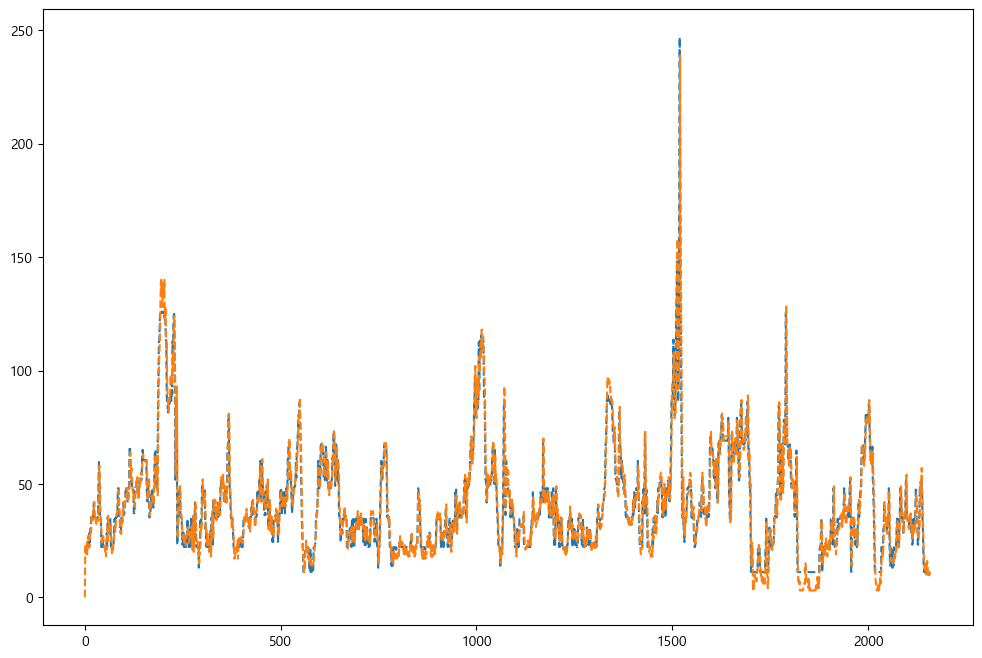

MSE :  45.78050626803163
R2 :  0.9171210484532386


In [133]:
# test_y 데이터와 y_pred_LR 데이터로 성능을 평가하여 출력해보세요.
# 성능지표는 mse와 r2를 이용하세요.
plt.figure(figsize = (12, 8))
plt.plot(y_pred, ls = "--")
plt.plot(y_test.values, ls = "--")
plt.show()

print("MSE : ", mean_squared_error(y_test, y_pred))
print("R2 : ", r2_score(y_test, y_pred))

In [ ]:
#최적 파라미터 적용해서 다시 학습

In [153]:
model = RandomForestRegressor(max_depth = 4, random_state = 1)

model.fit(x_train, y_train)

C:\Users\User\AppData\Local\Temp\ipykernel_4916\566869164.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


RandomForestRegressor(max_depth=4, random_state=1)

In [154]:
y_pred = model.predict(x_test)

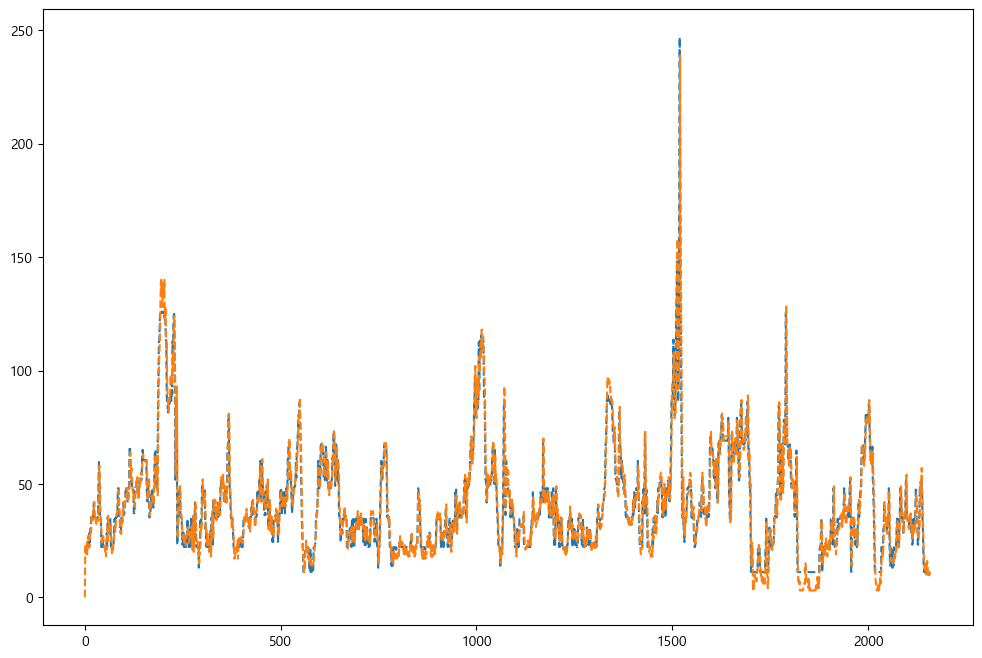

MSE :  45.78050626803163
R2 :  0.9171210484532386


In [155]:
# test_y 데이터와 y_pred_LR 데이터로 성능을 평가하여 출력해보세요.
# 성능지표는 mse와 r2를 이용하세요.
plt.figure(figsize = (12, 8))
plt.plot(y_pred, ls = "--")
plt.plot(y_test.values, ls = "--")
plt.show()

print("MSE : ", mean_squared_error(y_test, y_pred))
print("R2 : ", r2_score(y_test, y_pred))

In [134]:
# 학습한 모델을 pkl 파일로 저장해보세요.
import pickle
with open("RFR_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [135]:
# (다음 진행은 선택입니다)
# 렌덤포레스트로 학습한 모델의 feature_importances를 구해보세요.
# 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.
# Feature의 중요도 확인
best_model = model.best_estimator_
importances = best_model.feature_importances_
for feature, importance in zip(x_train.columns, importances):
    print(f'{feature}: {importance:.4f}')

SO2: 0.0003
CO: 0.0002
O3: 0.0005
NO2: 0.0009
PM10: 0.9765
PM25: 0.0034
기온(°C): 0.0002
강수량(mm): 0.0000
풍속(m/s): 0.0001
풍향(16방위): 0.0005
습도(%): 0.0004
증기압(hPa): 0.0001
이슬점온도(°C): 0.0003
현지기압(hPa): 0.0008
해면기압(hPa): 0.0008
전운량(10분위): 0.0001
중하층운량(10분위): 0.0001
시정(10m): 0.0010
지면온도(°C): 0.0005
5cm 지중온도(°C): 0.0002
10cm 지중온도(°C): 0.0002
20cm 지중온도(°C): 0.0015
30cm 지중온도(°C): 0.0070
month: 0.0000
day: 0.0003
hour: 0.0032
PM10_lag1: 0.0008


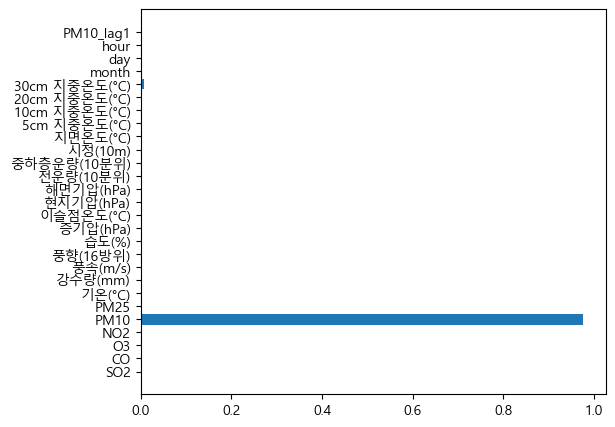

In [136]:
# 변수 중요도 시각화
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize = (6, 5))
plt.barh(list(x_train), model.best_estimator_.feature_importances_)
plt.show()

In [ ]:
# (선택) 확인할 수 있는 인사이트
# 1. PM10 특성이 제일 중요하다
# 2.
# 3.

#### **<span style="color:blue">(선택 수행)[4-2] 모델링: GradientBoosting</span>**

* GradientBoosting: 앞선 모델의 에러를 다음 모델의 예측 값으로 활용하면서 가중치 업데이트 하는데 경사하강법(Gradient Descent)를 활용해서 최적 모델을 만드는 기법
* Train과 Test로 나눈 데이터를 기준으로 그라디언트부스팅으로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : RMSE, R-squared Score(소수점 5째자리까지)

In [137]:
# 선언하기
model = XGBRegressor(random_state = 1)

# 학습하기
model.fit(x_train, y_train)

# 예측하기
y_pred = model.predict(x_test)

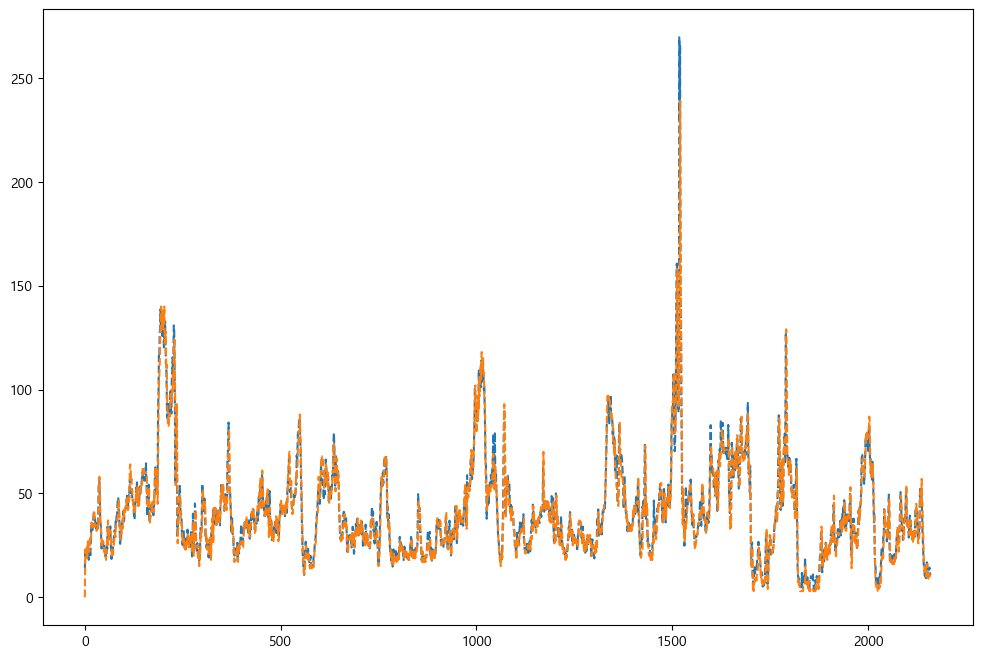

MSE :  46.891941315360064
R2 :  0.9151089568678901


In [138]:
# test_y 데이터와 y_pred_LR 데이터로 성능을 평가하여 출력해보세요.
# 성능지표는 mse와 r2를 이용하세요.
plt.figure(figsize = (12, 8))
plt.plot(y_pred, ls = "--")
plt.plot(y_test.values, ls = "--")
plt.show()

print("MSE : ", mean_squared_error(y_test, y_pred))
print("R2 : ", r2_score(y_test, y_pred))

In [139]:
# 학습한 모델을 pkl 파일로 저장해보세요.
import pickle
with open("XGB_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [140]:
# Feature의 중요도 확인
importances = model.feature_importances_
for feature, importance in zip(x_train.columns, importances):
    print(f'{feature}: {importance:.4f}')

SO2: 0.0005
CO: 0.0021
O3: 0.0013
NO2: 0.0024
PM10: 0.9217
PM25: 0.0029
기온(°C): 0.0026
강수량(mm): 0.0042
풍속(m/s): 0.0018
풍향(16방위): 0.0016
습도(%): 0.0071
증기압(hPa): 0.0016
이슬점온도(°C): 0.0013
현지기압(hPa): 0.0033
해면기압(hPa): 0.0015
전운량(10분위): 0.0015
중하층운량(10분위): 0.0038
시정(10m): 0.0023
지면온도(°C): 0.0013
5cm 지중온도(°C): 0.0018
10cm 지중온도(°C): 0.0017
20cm 지중온도(°C): 0.0018
30cm 지중온도(°C): 0.0152
month: 0.0012
day: 0.0053
hour: 0.0045
PM10_lag1: 0.0036


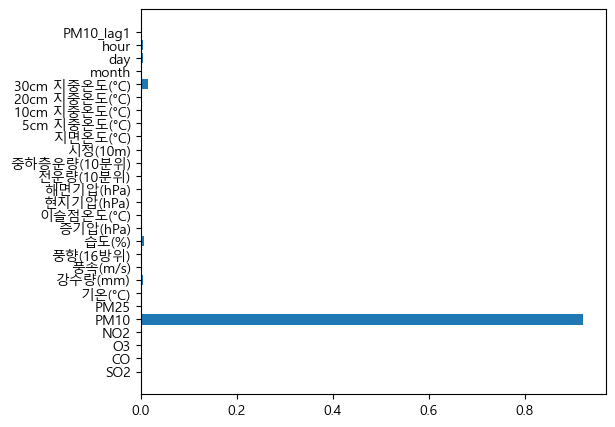

In [141]:
# 변수 중요도 시각화
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize = (6, 5))
plt.barh(list(x_train), model.feature_importances_)
plt.show()

In [ ]:
# 확인할 수 있는 인사이트
# 1. PM10 특성이 제일 중요하다
# 2.
# 3.

#### **<span style="color:blue">(선택 수행)[4-3] 모델링: Self Choice Model</span>**

* Self Choice Model: 앞선 교육과정에서 배운 머신러닝 모델 중 어떤 것이든 좋습니다. 원하는 모델을 선택해서 학습을 시켜보세요.
* Train과 Test로 나눈 데이터를 기준으로 Self Choice Model로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : RMSE, R-squared Score(소수점 5째자리까지)

In [142]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.

# 선언하기
model = DecisionTreeRegressor()

# 학습하기
model.fit(x_train, y_train)

# 예측하기
y_pred = model.predict(x_test)

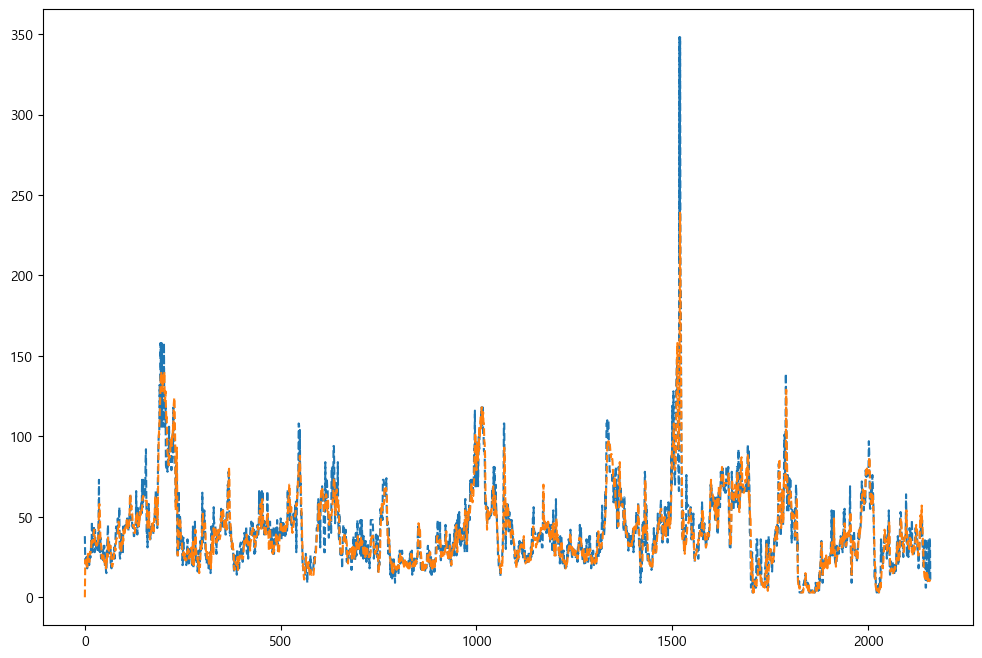

MSE :  111.16574074074074
R2 :  0.79875058640526


In [143]:
# test_y 데이터와 y_pred_LR 데이터로 성능을 평가하여 출력해보세요.
# 성능지표는 mse와 r2를 이용하세요.
plt.figure(figsize = (12, 8))
plt.plot(y_pred, ls = "--")
plt.plot(y_test.values, ls = "--")
plt.show()

print("MSE : ", mean_squared_error(y_test, y_pred))
print("R2 : ", r2_score(y_test, y_pred))

In [144]:
# 학습한 모델을 pkl 파일로 저장해보세요.
import pickle
with open("DT_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [145]:
# (다음 진행은 선택입니다)
# 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.
# Feature의 중요도 확인
importances = model.feature_importances_
for feature, importance in zip(x_train.columns, importances):
    print(f'{feature}: {importance:.4f}')

SO2: 0.0003
CO: 0.0009
O3: 0.0012
NO2: 0.0026
PM10: 0.9661
PM25: 0.0011
기온(°C): 0.0006
강수량(mm): 0.0006
풍속(m/s): 0.0016
풍향(16방위): 0.0005
습도(%): 0.0048
증기압(hPa): 0.0018
이슬점온도(°C): 0.0008
현지기압(hPa): 0.0005
해면기압(hPa): 0.0008
전운량(10분위): 0.0004
중하층운량(10분위): 0.0003
시정(10m): 0.0024
지면온도(°C): 0.0006
5cm 지중온도(°C): 0.0004
10cm 지중온도(°C): 0.0003
20cm 지중온도(°C): 0.0005
30cm 지중온도(°C): 0.0026
month: 0.0002
day: 0.0022
hour: 0.0035
PM10_lag1: 0.0023


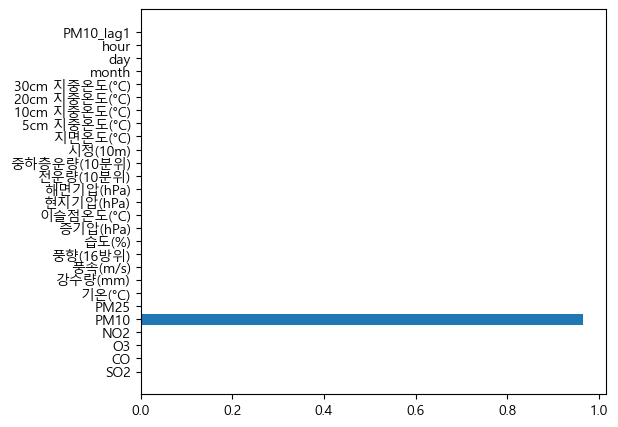

In [114]:
# 변수 중요도 시각화
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize = (6, 5))
plt.barh(list(x_train), model.feature_importances_)
plt.show()

In [ ]:
# 확인할 수 있는 인사이트
# 1. PM10 중요
# 2.
# 3.

#### **<span style="color:blue">(선택 수행)[4-4] 머신러닝 모델에 대해 성능 최적화 진행</span>**

* 위 머신러닝 모델들에 대해 성능 최적화를 진행해보세요.

In [146]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.

# 기본 모델 선언
model_DT = DecisionTreeRegressor(random_state = 2022)

# 파라미터 지정
param = {"max_depth" : range(1, 11)}

# 모델 선언
model = GridSearchCV(model_DT, param, cv = 3, scoring = "r2")

# 학습하기(많은 시간이 소요될 수 있음)
model.fit(x_train, y_train)

# 최적 파라미터, 예측 최고 성능
print(model.best_params_)
print(model.best_score_)

{'max_depth': 6}
0.7622766861321225


In [147]:
y_pred = model.predict(x_test)

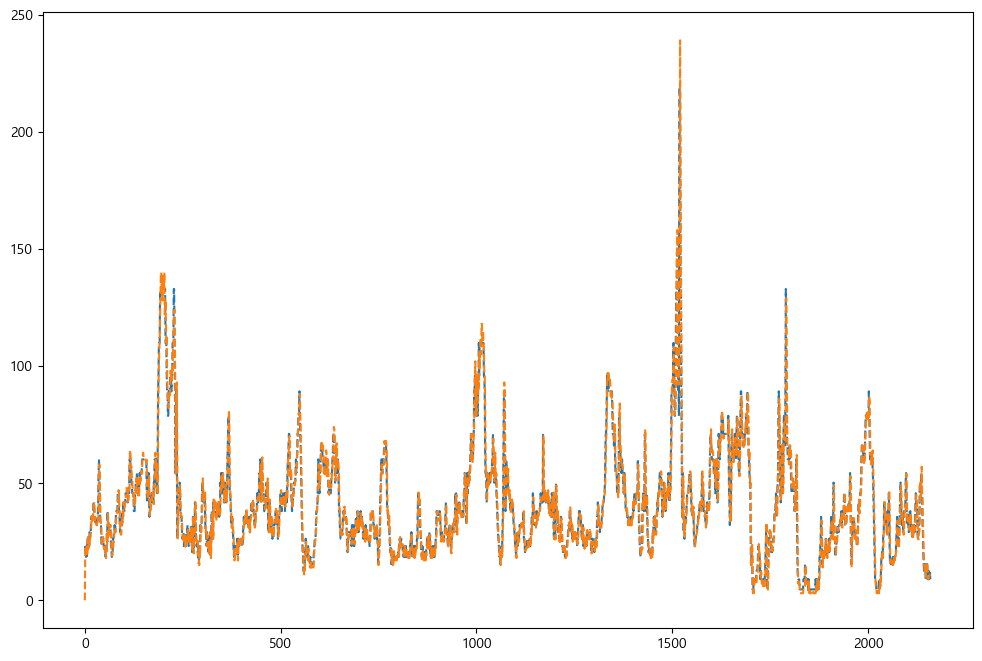

MSE :  41.44251398541142
R2 :  0.9249743528727348


In [148]:
# test_y 데이터와 y_pred_LR 데이터로 성능을 평가하여 출력해보세요.
# 성능지표는 mse와 r2를 이용하세요.
plt.figure(figsize = (12, 8))
plt.plot(y_pred, ls = "--")
plt.plot(y_test.values, ls = "--")
plt.show()

print("MSE : ", mean_squared_error(y_test, y_pred))
print("R2 : ", r2_score(y_test, y_pred))

In [149]:
# Feature의 중요도 확인
best_model = model.best_estimator_
importances = best_model.feature_importances_
for feature, importance in zip(x_train.columns, importances):
    print(f'{feature}: {importance:.4f}')

SO2: 0.0007
CO: 0.0003
O3: 0.0008
NO2: 0.0019
PM10: 0.9841
PM25: 0.0014
기온(°C): 0.0000
강수량(mm): 0.0004
풍속(m/s): 0.0000
풍향(16방위): 0.0000
습도(%): 0.0040
증기압(hPa): 0.0001
이슬점온도(°C): 0.0007
현지기압(hPa): 0.0002
해면기압(hPa): 0.0000
전운량(10분위): 0.0001
중하층운량(10분위): 0.0000
시정(10m): 0.0000
지면온도(°C): 0.0000
5cm 지중온도(°C): 0.0000
10cm 지중온도(°C): 0.0000
20cm 지중온도(°C): 0.0000
30cm 지중온도(°C): 0.0019
month: 0.0000
day: 0.0010
hour: 0.0022
PM10_lag1: 0.0000


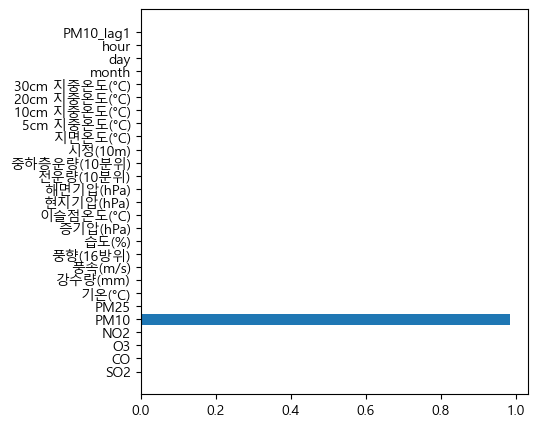

In [150]:
# 변수 중요도
plt.figure(figsize = (5, 5))
plt.barh(y = list(x_train), width = model.best_estimator_.feature_importances_)
plt.show()